<a href="https://colab.research.google.com/github/hatmer/url_classifier/blob/main/Phishing_URL_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

with open("results_b.txt") as fh:
  lines_b = fh.readlines()

with open("results_m.txt") as fh:
  lines_m = fh.readlines()

# split test and train data
from random import shuffle

data = []
for line in lines_m:
  if line:
    data.append((line.strip(), 1))
for line in lines_b:
  if line:
    data.append((line.strip(), 0))

shuffle(data)

train_count = int(.8 * len(data))
train_data = data[:train_count]
test_data = data[train_count:]

train_labels = []
train_examples = []
for (dp, label) in train_data:
  train_labels.append(label)
  train_examples.append(dp)

train_labels = np.array(train_labels)
train_examples = np.array(train_examples)

test_labels = []
test_examples = []
for (dp,label) in test_data:
  test_labels.append(label)
  test_examples.append(dp)

test_labels = np.array(test_labels)
test_examples = np.array(test_examples)


In [ ]:

print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 9331, test entries: 2333


In [ ]:
print(train_examples[0:10])
print(train_labels[0:10])

['dds microsoft com broken 1991 MarkMonitor Inc. markmonitor United States Redmond markmonitor hotline domains microsoft markmonitor Microsoft Corporation Domain Administrator deleted'
 'api16-access-sg pangle io secure IPv4 details IPv6 child nameserver authority mail 2019 GANDI SAS unknown missing imprecise anonymous unaffiliated nameless'
 'ib anycast adnxs com insecure IPv4 2008 MarkMonitor Inc. markmonitor United States New York markmonitor hotline appnexus markmonitor AppNexus Inc Domain Admin France international ASN-APPNEX US'
 'gv2q-ewh453-f321-f31-f31f infura-ipfs io secure IPv4 details IPv6 child nameserver authority mail 2020 GANDI SAS unknown missing imprecise anonymous unaffiliated nameless'
 'swamipllcstore com secure IPv4 IPv6 nameserver authority mail 2022 GoDaddy.com LLC godaddy United States Tempe godaddy hotline Domains By Proxy LLC Registration Private United Kingdom international TWENTYI GB United Kingdom CDN Cloud Platform'
 'honey io broken IPv4 details nameserv

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 124,644,769
Trainable params: 124,644,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy'),
                       tf.keras.metrics.TruePositives(thresholds=0.0),
                       tf.keras.metrics.FalsePositives(thresholds=0.0),
                       tf.keras.metrics.TrueNegatives(thresholds=0.0),
                       tf.keras.metrics.FalseNegatives(thresholds=0.0)])

In [ ]:
val = 4000
x_val = train_examples[:val]
partial_x_train = train_examples[val:]

y_val = train_labels[:val]
partial_y_train = train_labels[val:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/30
11/11 [==============================] - 38s 3s/step - loss: 0.6405 - accuracy: 0.6860 - true_positives_2: 2643.0000 - false_positives_2: 640.0000 - true_negatives_2: 1014.0000 - false_negatives_2: 1034.0000 - val_loss: 0.5547 - val_accuracy: 0.8052 - val_true_positives_2: 2637.0000 - val_false_positives_2: 719.0000 - val_true_negatives_2: 584.0000 - val_false_negatives_2: 60.0000
Epoch 2/30
11/11 [==============================] - 21s 2s/step - loss: 0.4868 - accuracy: 0.8366 - true_positives_2: 3594.0000 - false_positives_2: 788.0000 - true_negatives_2: 866.0000 - false_negatives_2: 83.0000 - val_loss: 0.4219 - val_accuracy: 0.8625 - val_true_positives_2: 2628.0000 - val_false_positives_2: 481.0000 - val_true_negatives_2: 822.0000 - val_false_negatives_2: 69.0000
Epoch 3/30
11/11 [==============================] - 22s 2s/step - loss: 0.3615 - accuracy: 0.8905 - true_positives_2: 3579.0000 - false_positives_2: 486.0000 - true_negatives_2: 1168.0000 - false_negatives_2: 98.0

In [ ]:
results = model.evaluate(test_examples, test_labels)

print(results)

73/73 [==============================] - 17s 233ms/step - loss: 0.0930 - accuracy: 0.9704 - true_positives_2: 1592.0000 - false_positives_2: 40.0000 - true_negatives_2: 672.0000 - false_negatives_2: 29.0000
[0.09302279353141785, 0.9704243540763855, 1592.0, 40.0, 672.0, 29.0]


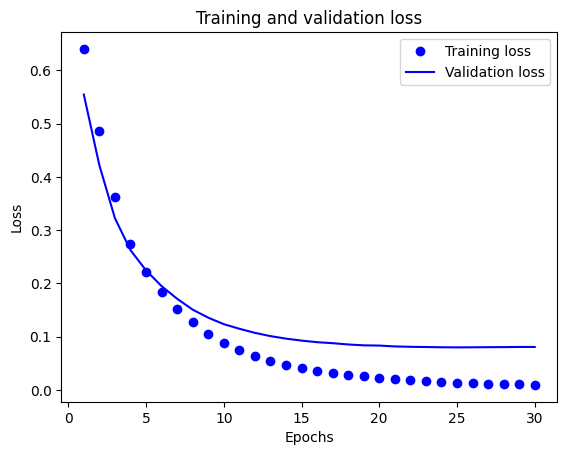

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

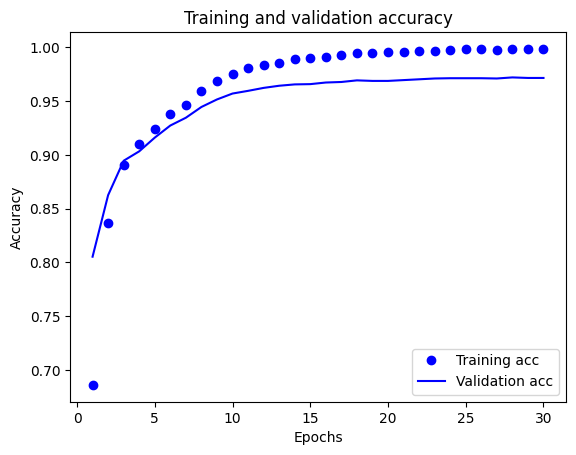

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
with open("testURLs.txt", 'r') as fh:
  testURLs = fh.readlines()

with open("results_test.txt", 'r') as fh:
  data = fh.readlines()


export_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Activation('sigmoid')
])

predictions = export_model.predict(data)

print("====== Benign Test URLs ======")
for i, url in enumerate(testURLs):
  if i == 20:
    print("\n====== Malicious Test URLs ======")
  if predictions[i] > 0.5:
    result = "malicious"
  else:
    result = "benign"
  print("{}: {}".format(result, url.strip()))




4/4 [==============================] - 1s 225ms/step
====== Benign Test URLs ======
malicious: nure.ua/
benign: kpi.ua/
benign: www.mit.edu/
malicious: www.bth.se/
benign: www.nioguard.com/
malicious: www.dnt-lab.com/
benign: www.stanford.edu/
benign: www.ox.ac.uk/
benign: www.purdue.edu/
benign: www.fiu.edu/
malicious: web.telegram.org/
benign: www.paypal.com/ua/home
malicious: engensec.eu/
malicious: www.knmu.kharkov.ua/index.php?lang=en
malicious: www.msu.ru/en/
benign: www.virustotal.com/
benign: www.virusbulletin.com/
benign: blackhat.com/
benign: www.rsaconference.com/en
malicious: www.ewdtest.com/

====== Malicious Test URLs ======
malicious: www.amazon-check-co-jp.s4u.top/
malicious: orange607.yolasite.com/
malicious: orange-auth-log.weebly.com/
malicious: www.amazon-check-co-jp.x8g.top/
malicious: myjcb.cn.availablepresen.buzz/
malicious: orange603.yolasite.com/
malicious: stadtsparkasse-giroverband10.xyz/sputnikv/anmeldung.php?starten...
malicious: stadtsparkasse-giroverband1